## Quiz 2 - Probability, Statistics (ლექცია 4, ლექცია 5) - 7 ქულა

იხილეთ LoanStatus.csv მონაცემთა ფაილი, რომელშიც მოცემულია კლიენტთა ინფორმაცია შემდეგი სვეტებით:

Loan ID - კლიენტის ID

Gender - სქესი

Married - დაქორზინებული არის თუ არა

Dependents - ოჯახის წევრების რაოდენობა, რომლის ფინანსურ მხარდაჭერასაც უზრუნველყოფს კლიენტი

Education - არის თუ არა უმაღლესი განათლების მქონე

Self_Employed - არის თუ არა თვითდასაქმებული

ApplicantIncome - კლიენტის შემოსავალი (per month)

LoanAmount  - სესხის რაოდენობა (ათასებში)

Loan_Amount_Term - სესხის ვადა

Credit_History - როგორი საკრედიტო ისტორია აქვს კლიენტს (1-კარგი, 0-ცუდი)

Property_Area - საცხოვრებელი და სამუშაო ადგილი

Loan_Status - სესხის გაცემის სტატუსი


## დავალება 1: აღწერილობითი სტატისტიკა  (1 ქულა)
ა) გახსენით ფაილი და დაბეჭდეთ აღწერილობითი სტატისტიკის მონაცემები თქვენთვის საინტერესო ველებისთვის, როგორიცაა საშუალო, მედიანა, მოდა, სტდ. გადახრა, ა.შ. (მოახდინეთ სიტყვიერი ინტერპრეტაცია);

ბ) დაითვალეთ თითოეულ სვეტში ცარიელი მნიშვნელობების რაოდენობა შესაბამისი ფუნქციით

In [ ]:
import pandas as pd
import warnings

from scipy.stats import norm
warnings.filterwarnings("ignore")

df = pd.read_csv("/content/LoanStatus.csv")
print("First few rows of the DataFrame:")
print(df.head())


First few rows of the DataFrame:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0             5849         NaN             360.0             1.0   
1             4583       128.0             360.0             1.0   
2             3000        66.0             360.0             1.0   
3             2583       120.0             360.0             1.0   
4             6000       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban        

In [ ]:
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
       ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History
count       614.000000  592.000000         600.00000      564.000000
mean       5403.459283  146.412162         342.00000        0.842199
std        6109.041673   85.587325          65.12041        0.364878
min         150.000000    9.000000          12.00000        0.000000
25%        2877.500000  100.000000         360.00000        1.000000
50%        3812.500000  128.000000         360.00000        1.000000
75%        5795.000000  168.000000         360.00000        1.000000
max       81000.000000  700.000000         480.00000        1.000000


In [ ]:
print("\nNumber of blank values in each column:")
print(df.isnull().sum())


Number of blank values in each column:
Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64


## დავალება 2:  ალბათობა (1 ქულა)
ა) დაითვალეთ, რა არის სესხის აღების ალბათობა Loan_Status-ის მიხედვით.

ბ) რა არის სესხის აღების ალბათობა, მაშინ როცა კლიენტს კარგი საკრედიტო ისტორია აქვს.

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [ ]:
total_loans = df['Loan_Status'].count()
approved_loans = df[df['Loan_Status'] == 'Y']['Loan_Status'].count()
probability_loan_approval = approved_loans / total_loans
print("Probability of getting a loan:", probability_loan_approval)

Probability of getting a loan: 0.6872964169381107


In [ ]:
good_credit_loans = df[(df['Loan_Status'] == 'Y') & (df['Credit_History'] == 1)]['Loan_Status'].count()
total_good_credit = df[df['Credit_History'] == 1]['Credit_History'].count()
probability_good_credit_loan = good_credit_loans / total_good_credit
print("Probability of getting a loan with good credit history:", probability_good_credit_loan)

Probability of getting a loan with good credit history: 0.7957894736842105


## დავალება 3: გრაფიკული წარმოდგენა (1 ქულა)
ა) seaborn.distplot ან seaborn.histplot() ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი გრაფიკი. ლინკი: https://seaborn.pydata.org/generated/seaborn.distplot.html

ბ) matplotlib.pyplot.hist ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი ჰისტოგრამი, რომელშიც bin-ების (ჰოსტოგრამაში ბლოკების) რაოდენობას თქვენ განსაზღვრავთ (მაგ. ჰისტოგრამაში 10 სვეტად წარმოადგინოთ მონაცემები.) იხ. დოკუმენტაცია შემდეგ ლინკზე: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

Future warnings-ების გამოსართავად ჩაწერეთ შემდეგი ბრძანებები:
import warnings
warnings.filterwarnings("ignore")

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")


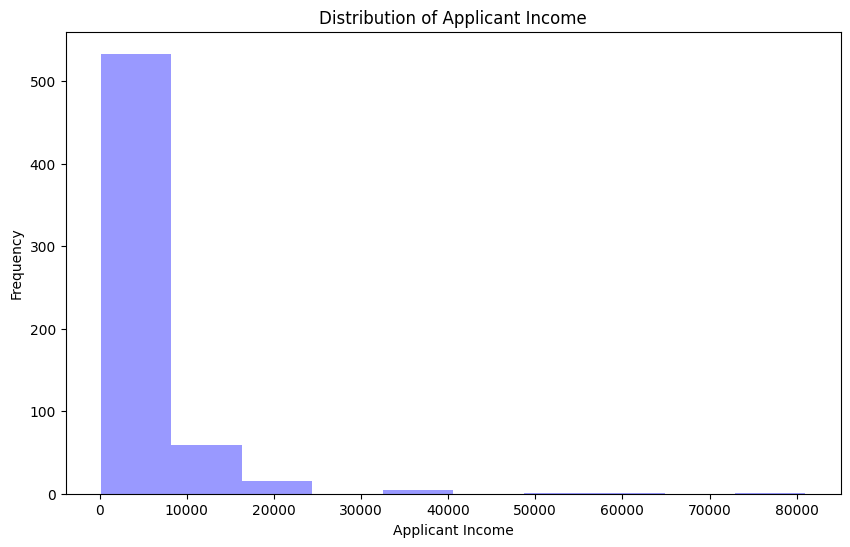

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(df['ApplicantIncome'], kde=False, bins=10, color='blue')
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

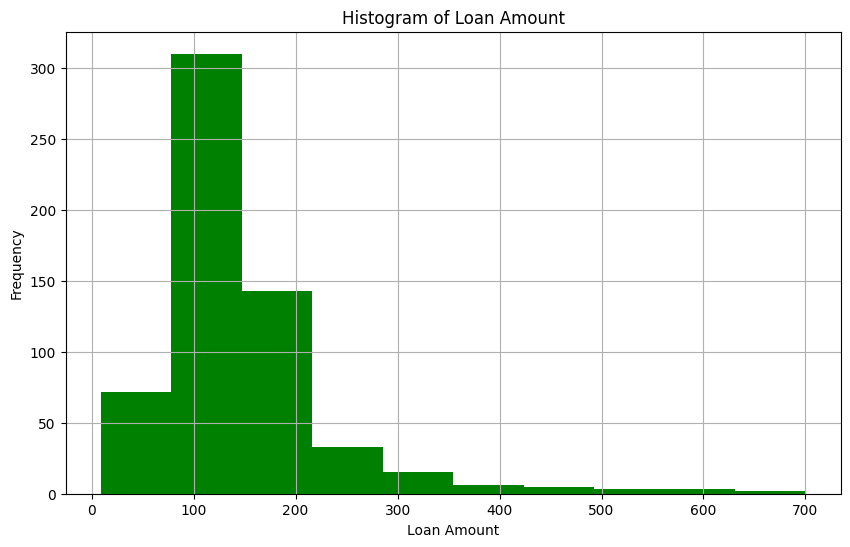

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['LoanAmount'], bins=10, color='green')
plt.title('Histogram of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## დავალება 4:  კუმულაციური ალბათობა (Cumulative distribution function) - (1 ქულა)
დაითვალეთ შემდეგი კუმულაციური ალბათობა scipy.stats.norm.cdf() ფუნქციის გამოყენებით.
დაითვალეთ კლიენტების რამდენ პროცენტს აქვს შემოსავალი 2000 ევროზე ნაკლები ყოველთვიურად.
norm.cdf(x, mean_val, std_dev_val) ფუნქციის პირველი პარამეტრია სასაზღვრო მნიშვნელობა, მეორე- საშუალო, მესამე -სტდ. გადახრა.

#### მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია

In [ ]:
from scipy.stats import norm

mean_income = df['ApplicantIncome'].mean()
std_dev_income = df['ApplicantIncome'].std()

income_limit = 2000
cumulative_probability = norm.cdf(income_limit, mean_income, std_dev_income)

percentage_less_than_2000 = cumulative_probability * 100

print("Percentage of customers with an income of less than 2,000 euros per month:", percentage_less_than_2000, "%")


Percentage of customers with an income of less than 2,000 euros per month: 28.872328177095586 %


## დავალება 5: სტატისტიკა (1 ქულა)

ააგეთ 2 boxplot დიაგრამა seaborn.boxplot() ფუნქციის გამოყენებით რომელიმე ველის მიმართ.

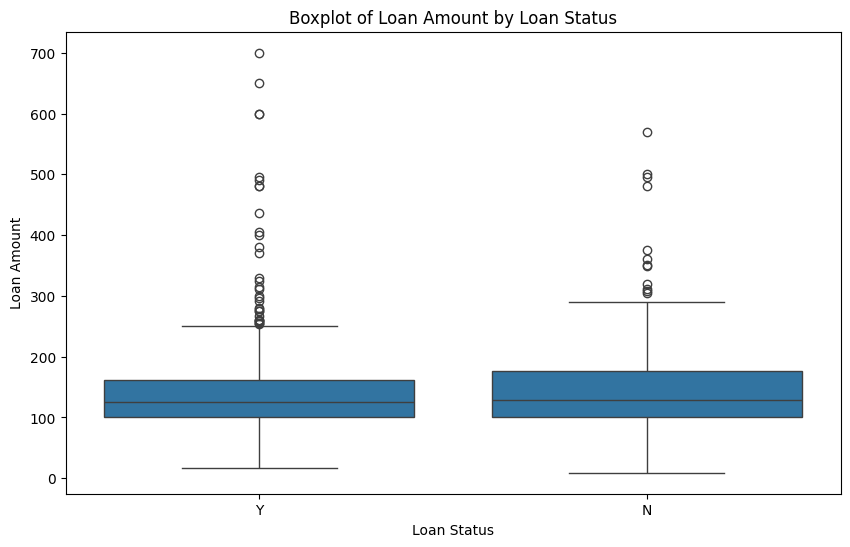

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.title('Boxplot of Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

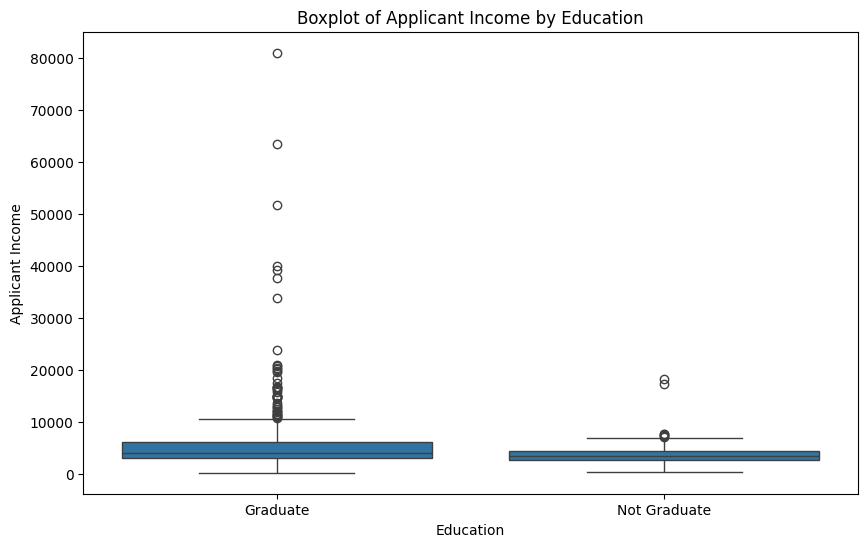

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='ApplicantIncome', data=df)
plt.title('Boxplot of Applicant Income by Education')
plt.xlabel('Education')
plt.ylabel('Applicant Income')
plt.show()

## დავალება 6: t-test (2 ქულა)
ა) გააკეთეთ t-test ანალიზი (One sample t-test)  რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_1samp ფუნქცია.

ბ) გააკეთეთ t-test ანალიზი (Two sample t-test) რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_ind ფუნქცია.

განსაზღვრეთ ნულოვანი და ალტერნატიული ჰიპოთეზა, გამოიყენეთ აღნიშნული ფუნქციები და მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია.

In [ ]:
from scipy.stats import ttest_1samp,ttest_ind

known_value = 150

t_statistic, p_value = ttest_1samp(df['LoanAmount'], known_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The mean loan amount is statistically different from", known_value)
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean loan amount and", known_value)

Fail to reject the null hypothesis. There is no significant difference in the mean loan amount and 150
